In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
df =pd.read_csv("Unemployment in India.csv")

In [32]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [33]:
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [35]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [36]:
categorical_columns = ['Region', 'Date', 'Frequency', 'Area']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [37]:
numerical_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

In [38]:
print("Number of missing values after handling:")
print(df.isnull().sum())

Number of missing values after handling:
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


# **Distribution of Region**

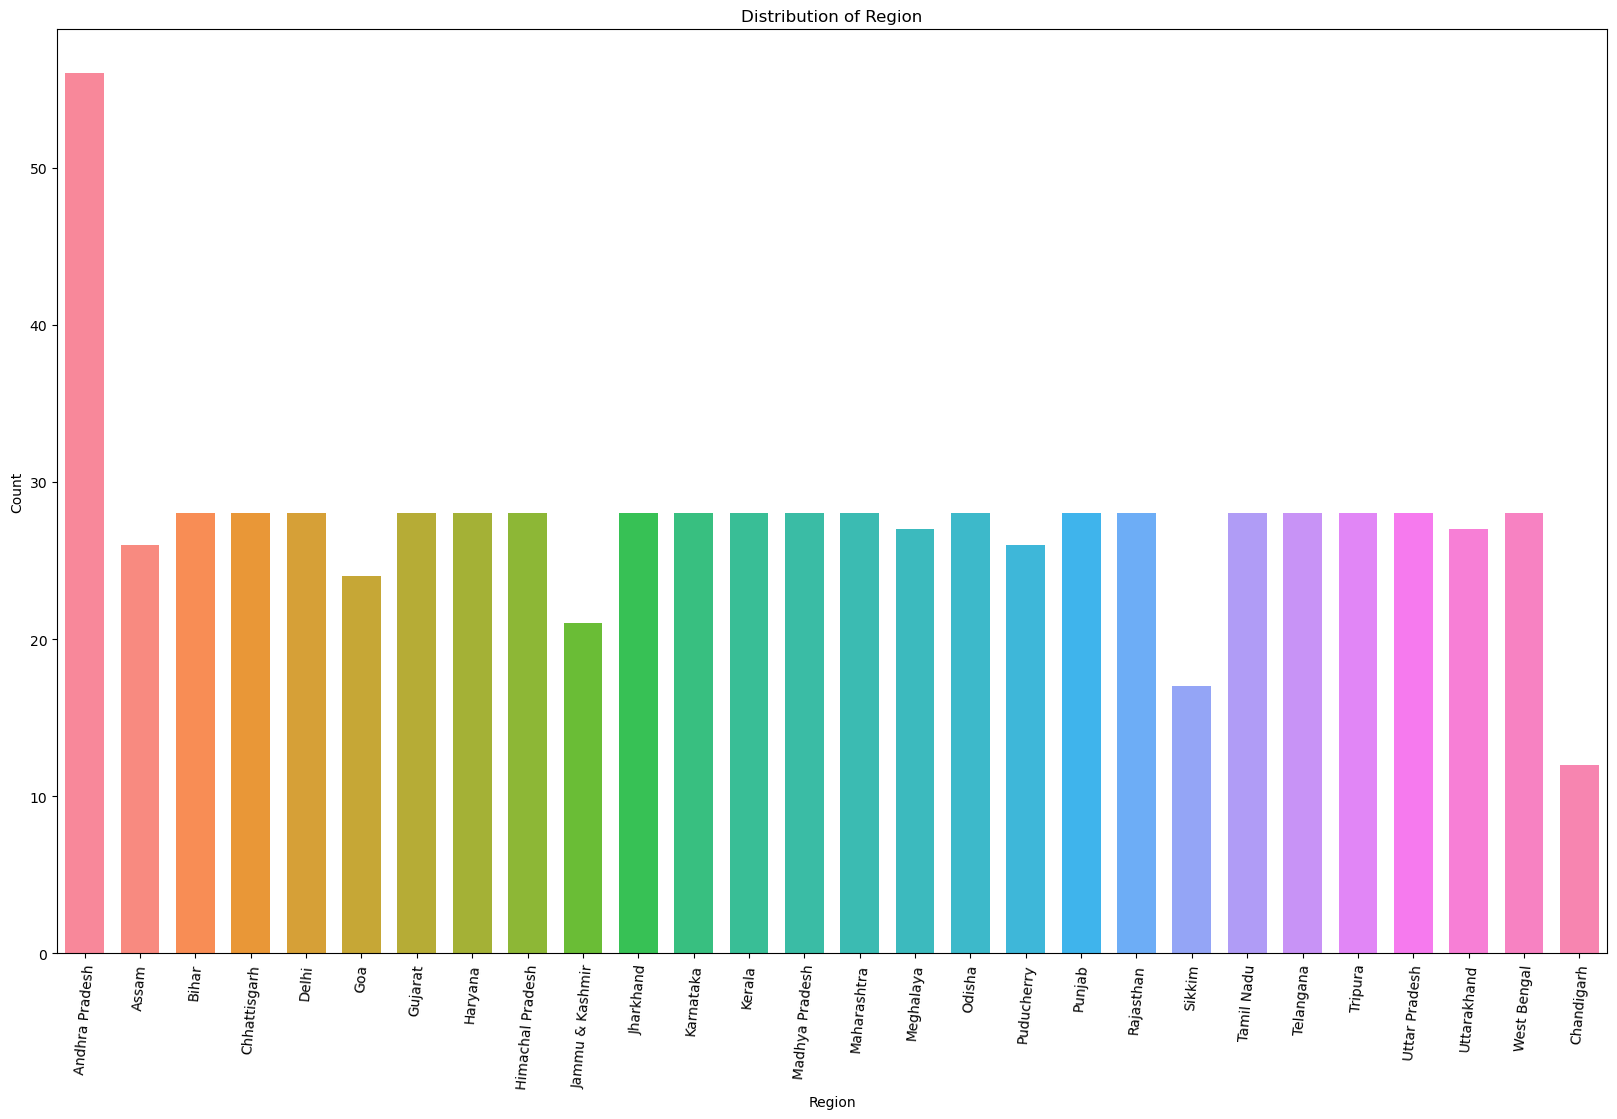

In [39]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Region', data=df, saturation=100,
    width=0.7)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

# **Estimated Unemployment Rate (%) over time**

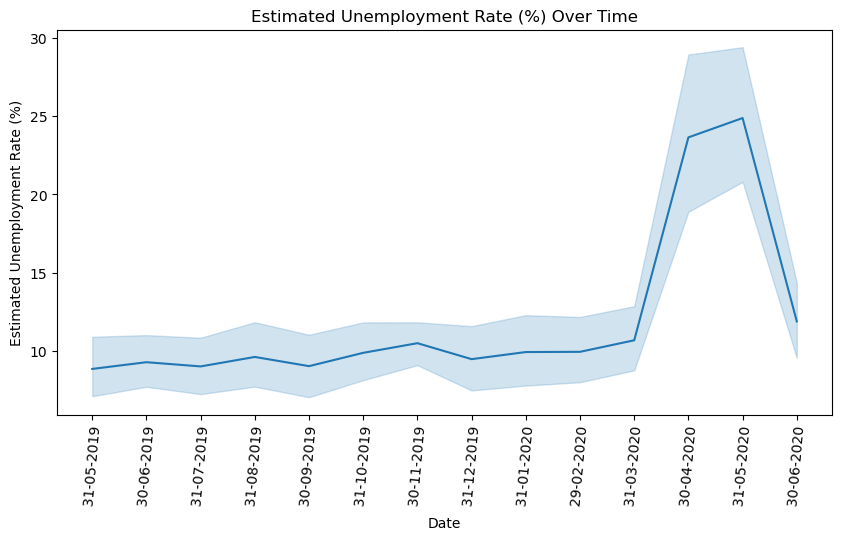

In [40]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Estimated Unemployment Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=85)
plt.show()

# **Pie chart for Area distribution**

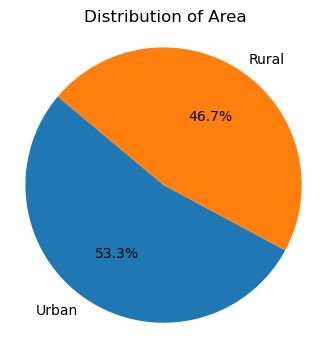

In [41]:
area_counts = df['Area'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Area')
plt.axis('equal')
plt.show()

# **Histograms for numerical variables**

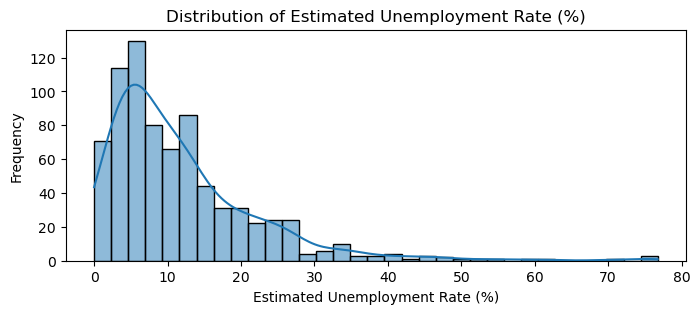

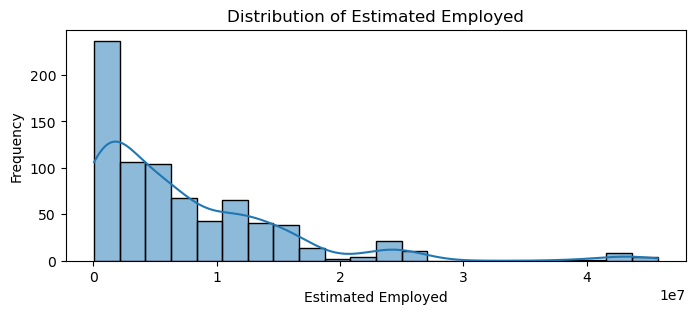

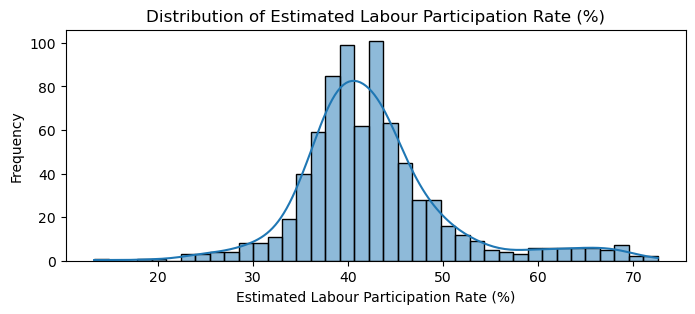

In [42]:
# Histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(8,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# **Correlation Matrix**

In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Andhra Pradesh,Region_Assam,Region_Bihar,Region_Chandigarh,Region_Chhattisgarh,Region_Delhi,Region_Goa,...,Date_ 31-05-2019,Date_ 31-05-2020,Date_ 31-07-2019,Date_ 31-08-2019,Date_ 31-10-2019,Date_ 31-12-2019,Frequency_ Monthly,Frequency_Monthly,Area_Rural,Area_Urban
0,3.65,11999139.0,43.24,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
1,3.05,11755881.0,42.05,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,3.75,12086707.0,43.50,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,3.32,12285693.0,43.97,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,5.17,12256762.0,44.68,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


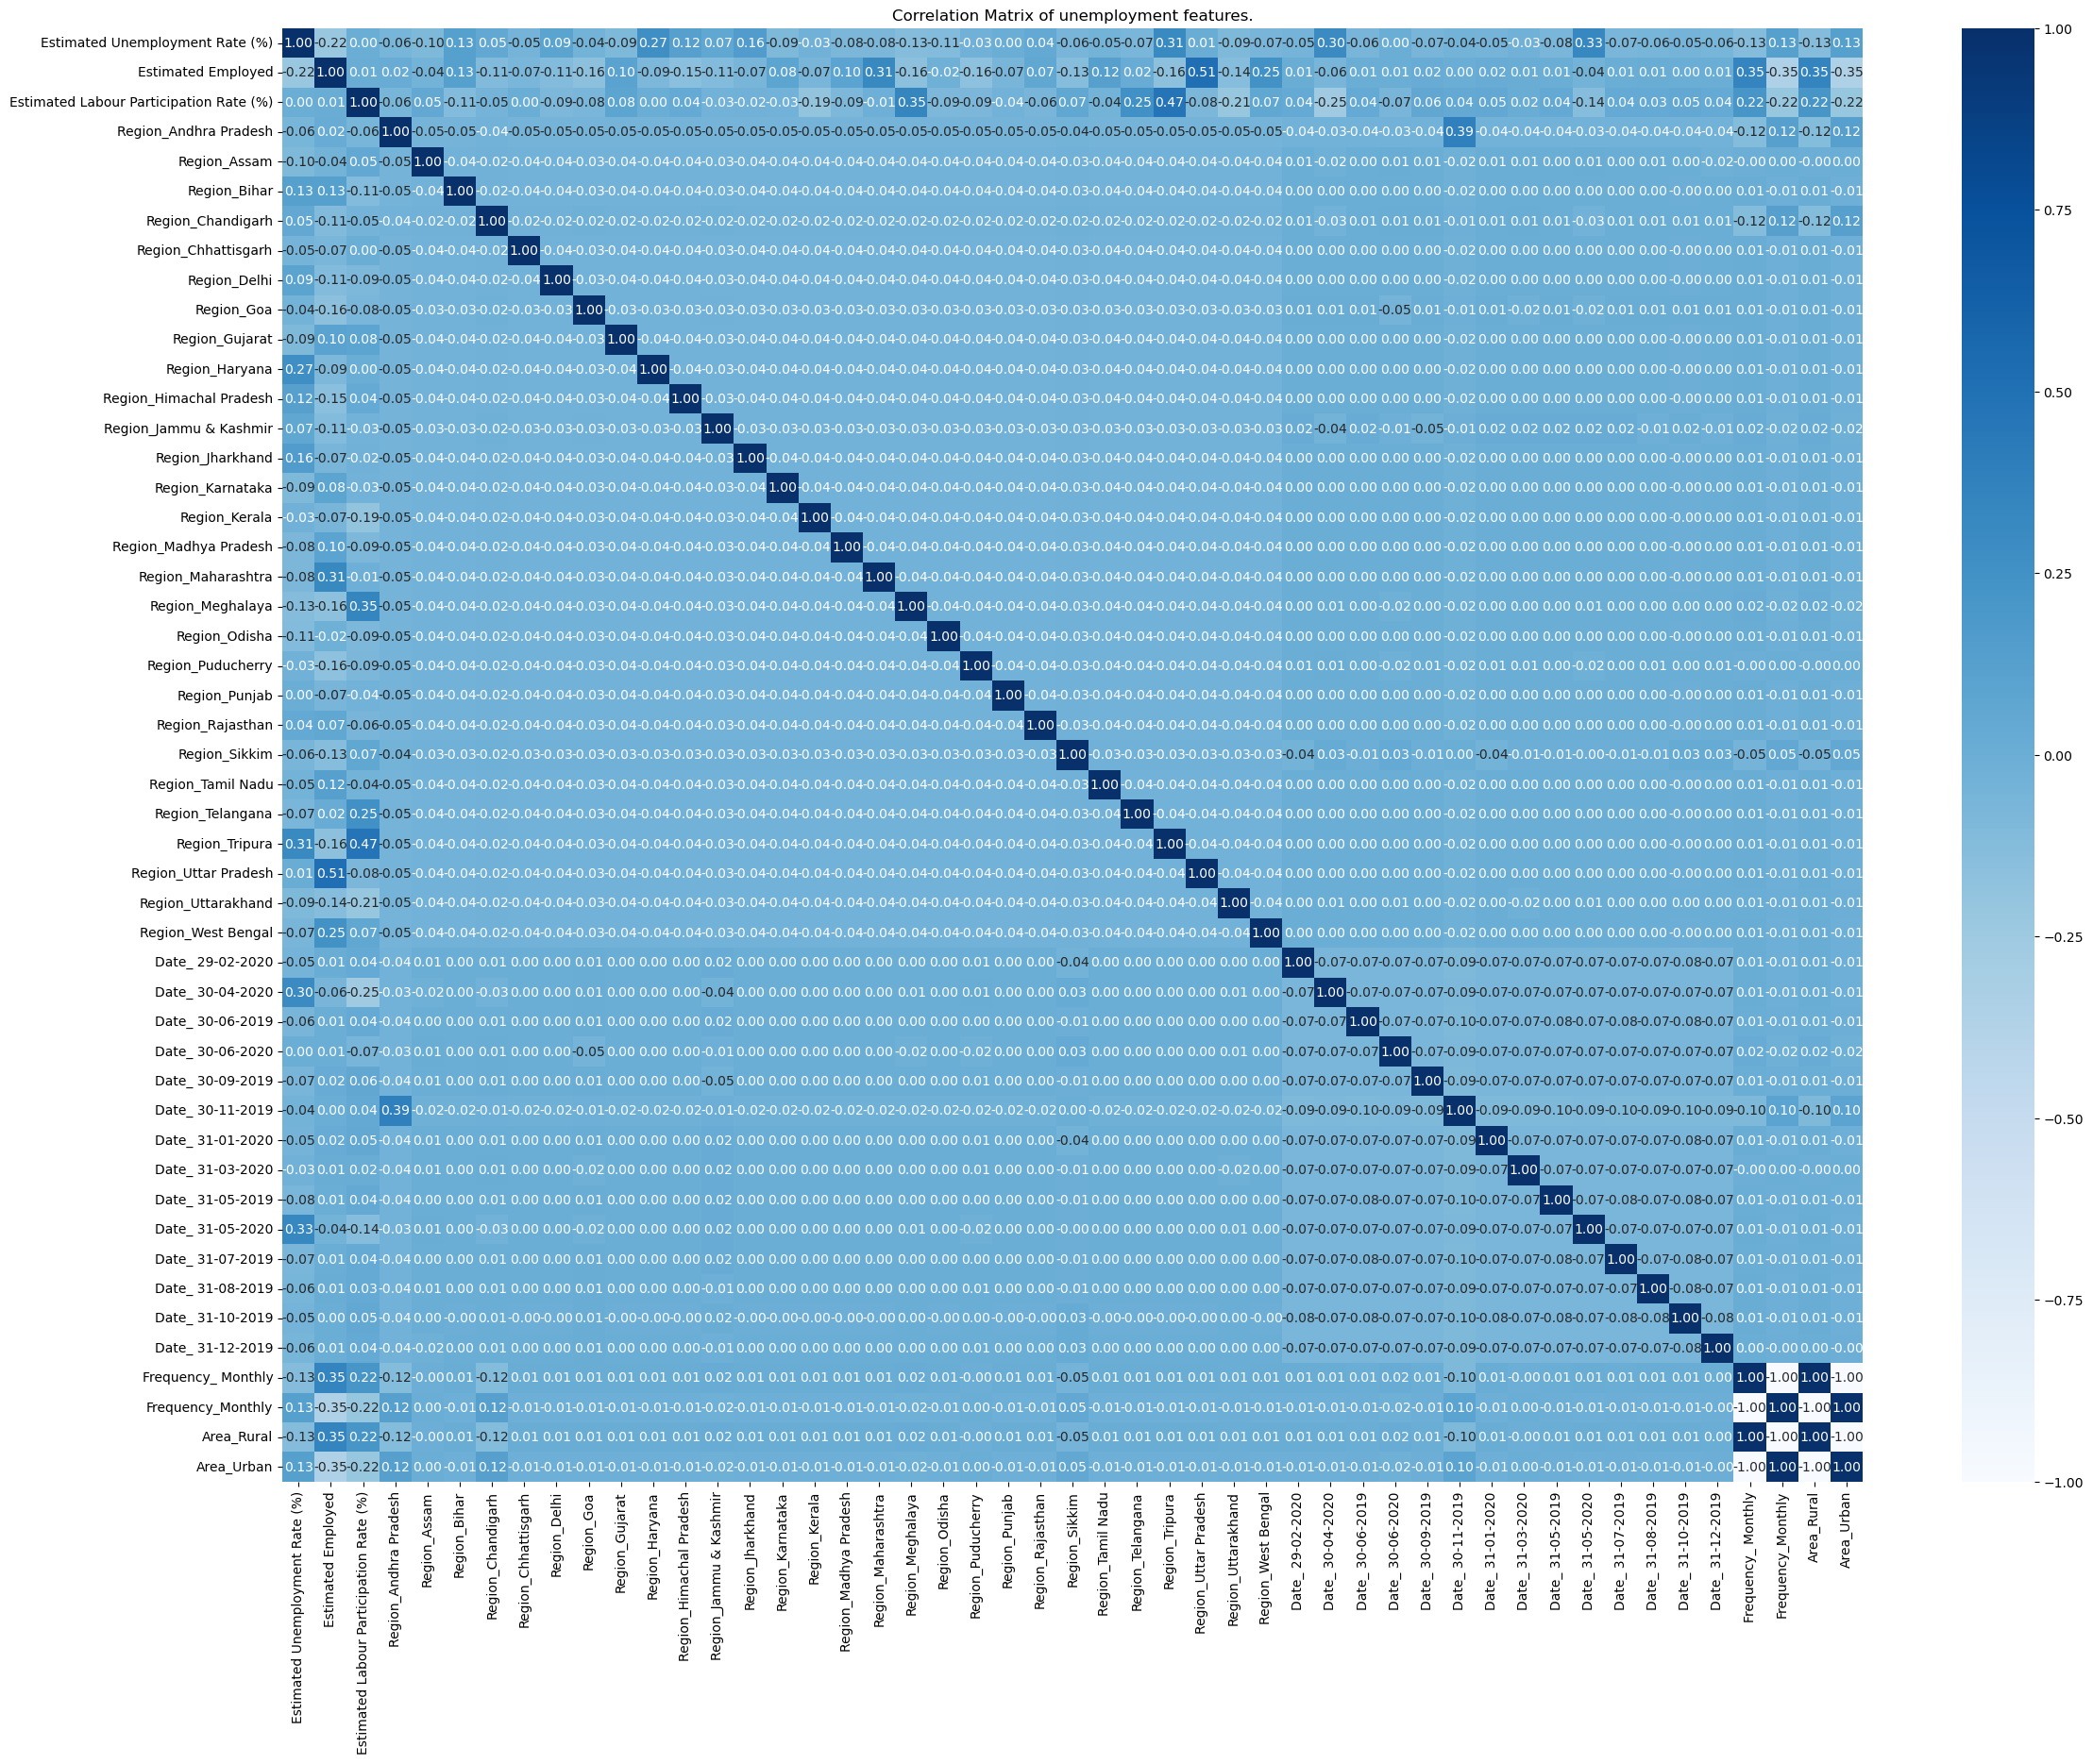

In [44]:
plt.figure(figsize=(27, 20))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of unemployment features.')
plt.show()

# **Relationship between unemployment rate, employed, and region**

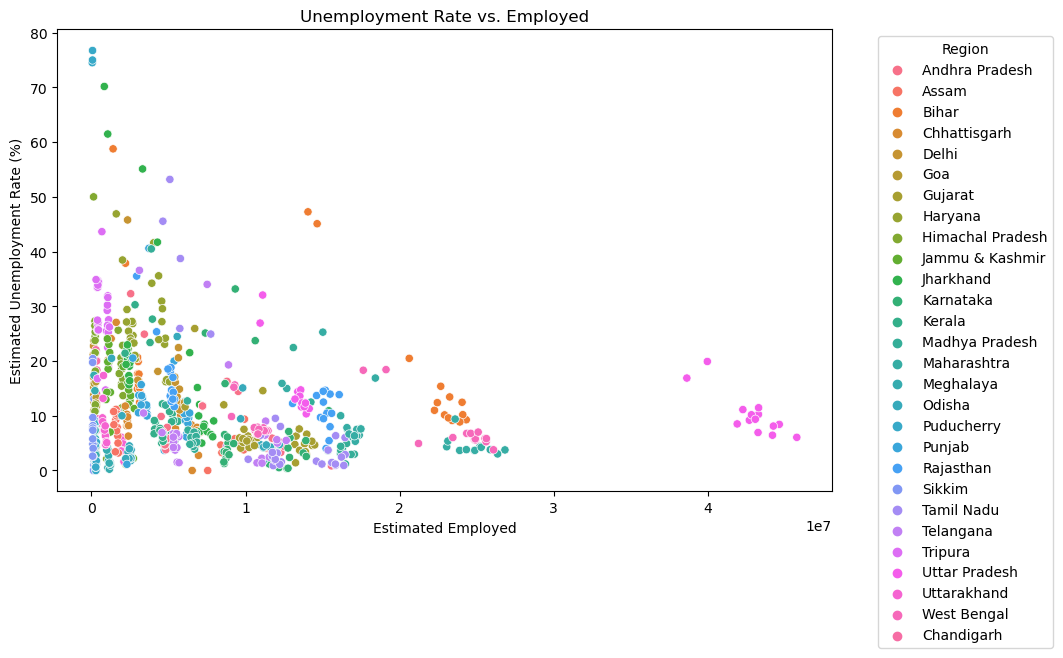

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Unemployment Rate vs. Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Trend of unemployment rate over time**

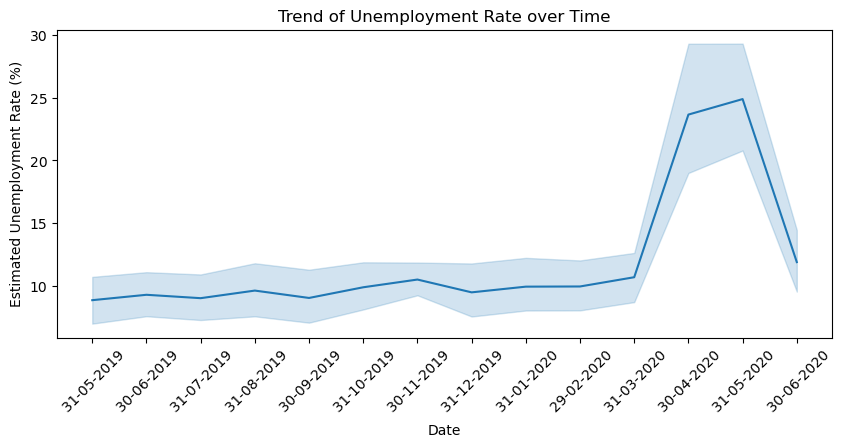

In [46]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Trend of Unemployment Rate over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()